<a href="https://colab.research.google.com/github/GuCuChiara/Cats-and-Dogs/blob/main/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cats and Dogs
###Clasificación binaria de imágenes de perros y gatos utilizando tensorflow y keras.

###Montamos nuestro drive en colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importamos las librerías y definimos nuestra carpeta de trabajo con las imágenes:


In [2]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)   #Descargar el dataset 
PATH ='/content/drive/MyDrive/Colab Notebooks/machine learning proyects/Cats and Dogs/cats_and_dogs_filtered'
carpeta_encontrada = os.path.exists(PATH)
print(f"Carpeta de trabajo encontrada: {carpeta_encontrada}")

train_dir = os.path.join(PATH, 'train')
image_input_shape = (160,160)

datagen = ImageDataGenerator()  #Generador de imagen, para crear los batches

train_batches = datagen.flow_from_directory(
    train_dir,
    target_size=image_input_shape,
    shuffle=True,
    batch_size=32,
    class_mode="binary", 
    )

Carpeta de trabajo encontrada: True
Found 2000 images belonging to 2 classes.


###Observamos los índices de cada clase binaria:

In [3]:
train_batches.class_indices

{'cats': 0, 'dogs': 1}

In [4]:
images, labels = next(train_batches) #El comando next de Python nos trae la siguiente salida del generador

print(images.shape, f"{images.shape[0]} imágenes de dimensión {images.shape[1]}x{images.shape[2]}x{images.shape[3]}")
print(labels.shape, f"{labels.shape[0]} etiquetas.")

(32, 160, 160, 3) 32 imágenes de dimensión 160x160x3
(32,) 32 etiquetas.


###Graficamos algunas imagenes de este batch

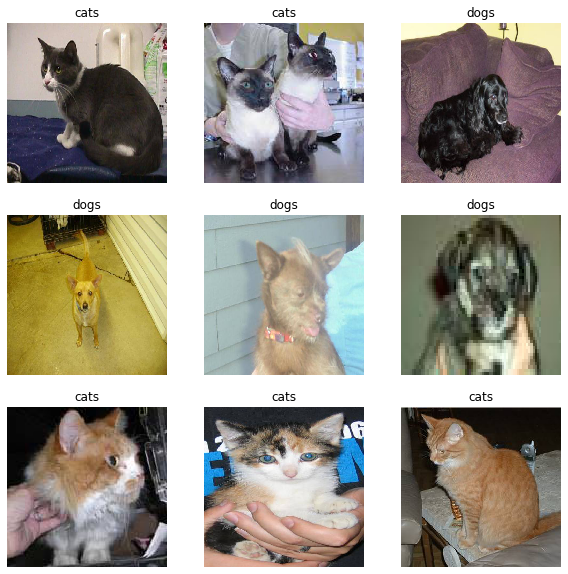

In [5]:
from matplotlib import pyplot as plt
class_names = list(train_batches.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(9):
  
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i].astype("uint8"))
  plt.title(class_names[int(labels[i,])])
  plt.axis("off")

###Arquitectura de la red neuronal:

In [6]:
from tensorflow.keras.models import Sequential   #Para armar modelos
from tensorflow.keras.layers import Flatten,Input, Conv2D,MaxPooling2D, Dense

model = Sequential()
model.add(Conv2D(32, input_shape = (160,160,3), kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))   #La capa max-pooling es una operación sin pesos, que permite obtener una salida de menor dimension
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  #La capa flatten convierte el tensor de entrada en un tensor de rank=1, apto para ser la entrada de una capa densa
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 92416)             0         
                                                                 
 dense (Dense)               (None, 1)                 9

###Función de costo para clasificación: entropía cruzada
* Objetivo: Medir la diferencia entre la etiqueta  y  y la predicción  y^  para todas las imágenes del batch

* Cuando la tarea de clasificación tiene dos clases, la etiqueta  y  puede valer 0 o 1. La predicción, si la salida es una sigmoidea, puede tomar valores continuos entre 0 y 1.

* En este caso usamos la entropía cruzada binaria como función de costo.

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

#Para etiquetas categóricass usaríamos:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

 ### Vemos los pesos de los primeros dos kernels:

In [8]:
print(model.layers[0].weights[0].shape)

print('Primer kernel')
print(model.layers[0].weights[0][:,:,0,0])

print('Segundo kernel')
print(model.layers[0].weights[0][:,:,0,1])

(3, 3, 3, 32)
Primer kernel
tf.Tensor(
[[-0.13500336  0.07740602  0.13385402]
 [-0.02965385  0.04785532 -0.10577072]
 [-0.01664553 -0.04922496 -0.02771997]], shape=(3, 3), dtype=float32)
Segundo kernel
tf.Tensor(
[[-0.01989903  0.12410919  0.00738418]
 [-0.04783686  0.07340281 -0.0319723 ]
 [ 0.12837516 -0.10998452  0.0287849 ]], shape=(3, 3), dtype=float32)


###Entrenamiento:

In [9]:
model.fit(#x_train,y_train_categorical, #Datos de entrenamiento
          train_batches,
          epochs=10, 
          #batch_size=250, #Hiperparametros basicos
          workers=8)

Epoch 1/10
63/63 [==============================] - 81s 977ms/step - loss: 21.3860 - accuracy: 0.5145
Epoch 2/10
63/63 [==============================] - 6s 89ms/step - loss: 0.6249 - accuracy: 0.6365
Epoch 3/10
63/63 [==============================] - 6s 93ms/step - loss: 0.4812 - accuracy: 0.7545
Epoch 4/10
63/63 [==============================] - 8s 111ms/step - loss: 0.3410 - accuracy: 0.8485
Epoch 5/10
63/63 [==============================] - 8s 115ms/step - loss: 0.2312 - accuracy: 0.8975
Epoch 6/10
63/63 [==============================] - 7s 107ms/step - loss: 0.1560 - accuracy: 0.9420
Epoch 7/10
63/63 [==============================] - 6s 88ms/step - loss: 0.1310 - accuracy: 0.9535
Epoch 8/10
63/63 [==============================] - 6s 87ms/step - loss: 0.1303 - accuracy: 0.9530
Epoch 9/10
63/63 [==============================] - 6s 88ms/step - loss: 0.0882 - accuracy: 0.9715
Epoch 10/10
63/63 [==============================] - 7s 95ms/step - loss: 0.1026 - accuracy: 0.9675


In [10]:
#Veamos como cambiaron los pesos de los dos primeros kernels de la primera capa!

print('Primer kernel')
print(model.layers[0].weights[0][:,:,0,0])

print('Segundo kernel')
print(model.layers[0].weights[0][:,:,0,1])

Primer kernel
tf.Tensor(
[[-0.13704972  0.07543103  0.13293186]
 [-0.03193422  0.04568996 -0.10737856]
 [-0.0184099  -0.05094241 -0.02923982]], shape=(3, 3), dtype=float32)
Segundo kernel
tf.Tensor(
[[-0.03697593  0.09781444 -0.01789969]
 [-0.06111495  0.05723191 -0.0512797 ]
 [ 0.12815942 -0.12514292  0.00720737]], shape=(3, 3), dtype=float32)


(32, 160, 160, 3)
(32, 158, 158, 32)


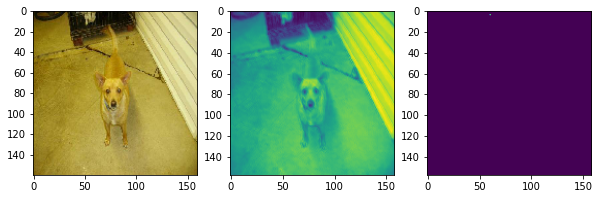

In [11]:
fig,axs = plt.subplots(1,3,figsize=(10,10))
idImagen = 3
imagenTransf = model.layers[0](images)
axs[0].imshow(images[idImagen].astype("uint8"))  #Entrada

axs[1].imshow(imagenTransf[idImagen,:,:,7]) #Salida de un filtro
axs[2].imshow(imagenTransf[idImagen,:,:,1]) #Salida de otro filtro
print(images.shape)
print(imagenTransf.shape)

###Evaluamos sobre un conjunto nuevo de imágenes, los datos de testeo

In [12]:
test_dir = os.path.join(PATH, 'validation')
test_batches = datagen.flow_from_directory(
    test_dir,
    target_size=image_input_shape,
    shuffle=False,
    class_mode="binary", 
    )

Found 1000 images belonging to 2 classes.


In [13]:
test_results = model.evaluate(test_batches)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

32/32 [==============================] - 142s 5s/step - loss: 2.3160 - accuracy: 0.5780
Test results - Loss: 2.315999984741211 - Accuracy: 57.8000009059906%




---



##Mejorando el desempeño de la red:

### Subset de validacion para monitoreo del entrenamiento:

In [14]:
datagen = ImageDataGenerator(validation_split=0.2) #20 % del dataset para validación 

train_batches = datagen.flow_from_directory(
    train_dir,
    target_size=image_input_shape,
    shuffle=True,
    batch_size=32,
    class_mode="binary", 
    subset='training',
    seed=42)
    

valid_batches = datagen.flow_from_directory(
    train_dir,
    target_size=image_input_shape,
    shuffle=True,
    batch_size=32,
    class_mode="binary", 
    subset='validation',
    seed=42)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


### Data augmentation:

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation,RandomFlip

data_augmentation = Sequential([
  RandomFlip('horizontal'),
  RandomRotation(0.2),
])



---



###Transferencia de aprendizaje (transfer-learning):
* La mayoría de los modelos que resuelven problemas complejos requieren de una enorme cantidad de datos, y conseguir datos etiquetados para modelos supervisados puede ser realmente difícil. 

* Existen datasets públicos muy grandes para tareas generales de visión computacional, por ejemplo ImageNet (1), que fue construido por Stanford.

* ImageNet cuenta con 1.300.000 de imágenes etiquetadas según 1.000 categorías de objetos. 

* Sin embargo, para tareas específicas se necesitan modelos de DL especializados en un dominio particular de imágenes, y construir datasets de esas dimensiones es un trabajo de difícil factibilidad.

* Una estrategia muy utilizada para entrenar un modelo de DL es usar un modelo pre-entrenado, que significa que es un modelo cuyos pesos fueron ajustados para otro dominio. 

* Asumimos que el dominio fuente es similar a nuestro dominio objetivo. En imágenes, los modelos generalmente están pre-entrenados en algún dataset público de gran volumen, como ImageNet.

In [17]:
from tensorflow.keras.applications import VGG16
model = Sequential()
model.add(data_augmentation)

conv_base = VGG16(weights="imagenet", include_top=False,
                  input_shape=(160,160,3))
conv_base.trainable = False
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 


In [20]:
history = model.fit(
          train_batches,#Datos de entrenamiento
          epochs=10, 
          validation_data=valid_batches,
          workers=8)

Epoch 1/10


50/50 [==============================] - 21s 294ms/step - loss: 4.1467 - accuracy: 0.8062 - val_loss: 0.1506 - val_accuracy: 0.9550
Epoch 2/10
50/50 [==============================] - 14s 276ms/step - loss: 0.2697 - accuracy: 0.8925 - val_loss: 0.1409 - val_accuracy: 0.9425
Epoch 3/10
50/50 [==============================] - 15s 291ms/step - loss: 0.1904 - accuracy: 0.9194 - val_loss: 0.1209 - val_accuracy: 0.9625
Epoch 4/10
50/50 [==============================] - 14s 275ms/step - loss: 0.1449 - accuracy: 0.9406 - val_loss: 0.1414 - val_accuracy: 0.9525
Epoch 5/10
50/50 [==============================] - 17s 310ms/step - loss: 0.1361 - accuracy: 0.9475 - val_loss: 0.1682 - val_accuracy: 0.9575
Epoch 6/10
50/50 [==============================] - 14s 272ms/step - loss: 0.0974 - accuracy: 0.9613 - val_loss: 0.1772 - val_accuracy: 0.9500
Epoch 7/10
50/50 [==============================] - 16s 297ms/step - loss: 0.1079 - accuracy: 0.9588 - val_loss: 0.1172 - val_accuracy: 0.9650
Epoch 8/10

###Vemos el desempeño con transfer-learning y data augmentation:

In [51]:
test_results = model.evaluate(valid_batches)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

13/13 [==============================] - 2s 134ms/step - loss: 0.1962 - accuracy: 0.9525
Test results - Loss: 0.19620996713638306 - Accuracy: 95.24999856948853%


###¿Qué devuelve el método .fit?

In [52]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


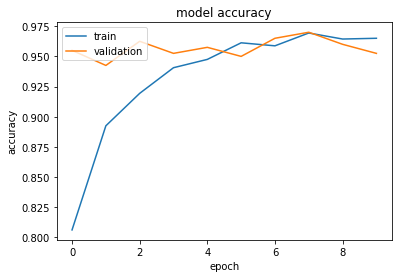

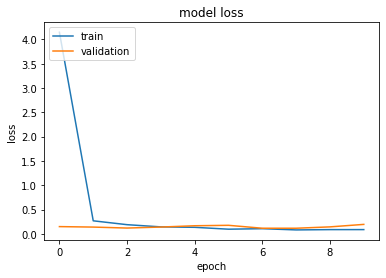

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###¿Como interpretamos las curvas?

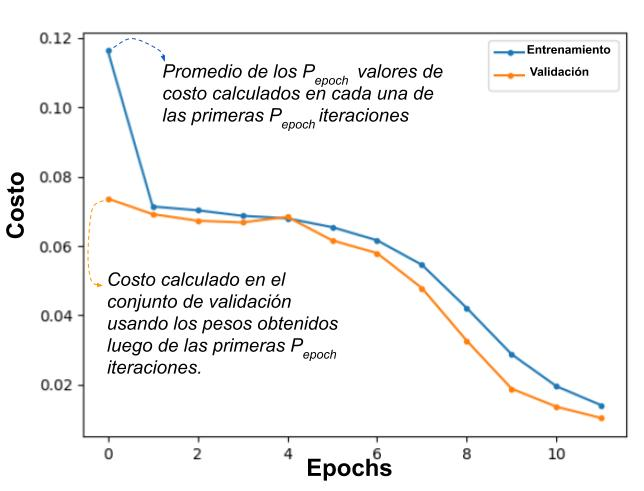

### Tomamos un batch de imagenes de test:

In [54]:
imagenes_batch, etiquetas_batch = next(valid_batches)
predicciones = model.predict(imagenes_batch).flatten()
predicciones_binarias = tf.where(predicciones < 0.5, 0, 1)

1/1 [==============================] - 0s 37ms/step


In [55]:
print(predicciones)
print(predicciones_binarias)

[4.6151192e-07 1.4820518e-10 3.5389647e-05 1.6726181e-06 1.0058936e-08
 9.9872953e-01 1.1563200e-19 1.3813523e-04 1.0902935e-11 1.0000000e+00
 1.0000000e+00 4.8333046e-04 5.2864152e-06 2.0627286e-01 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.2154189e-04 9.9883622e-01
 9.9998617e-01 1.0000000e+00 8.5102732e-04 2.3462209e-01 9.9971670e-01
 9.9999964e-01 1.0000000e+00 4.0031818e-01 9.9393940e-01 1.2511006e-19
 1.0000000e+00 1.0000000e+00]
tf.Tensor([0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)


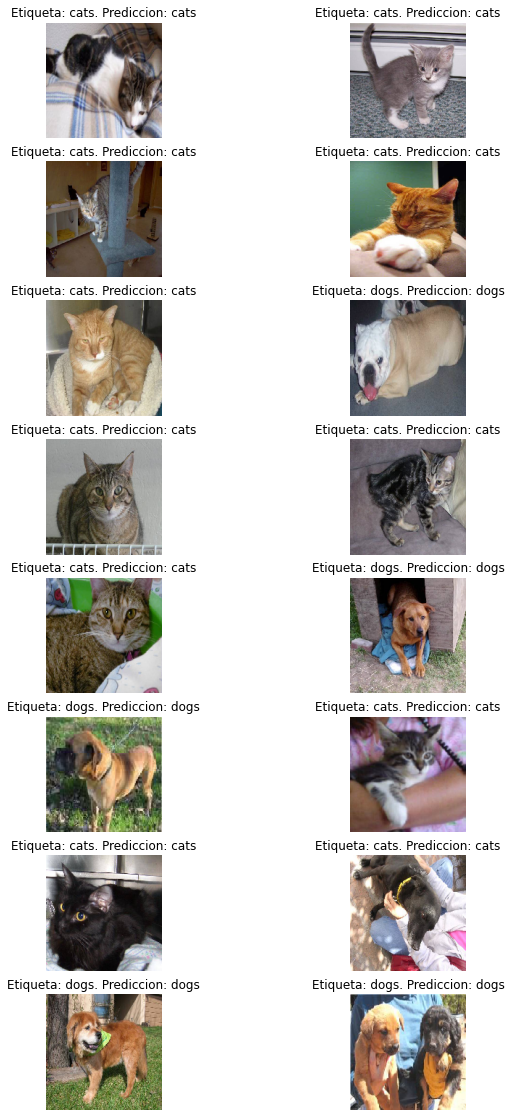

In [56]:
plt.figure(figsize=(10, 20))
for i in range(16):
  ax = plt.subplot(8, 2, i + 1)
  plt.imshow(imagenes_batch[i].astype("uint8"))
  plt.title(f"Etiqueta: {class_names[predicciones_binarias[i,]]}. Prediccion: {class_names[predicciones_binarias[i]]}")
  plt.axis("off")